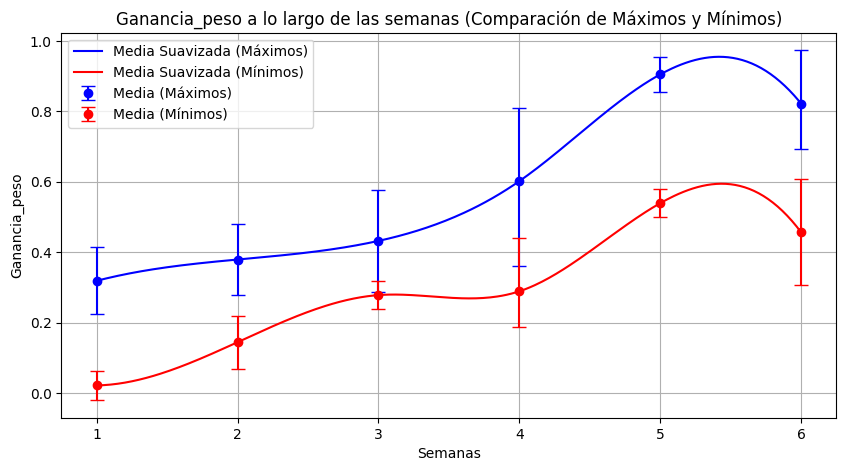

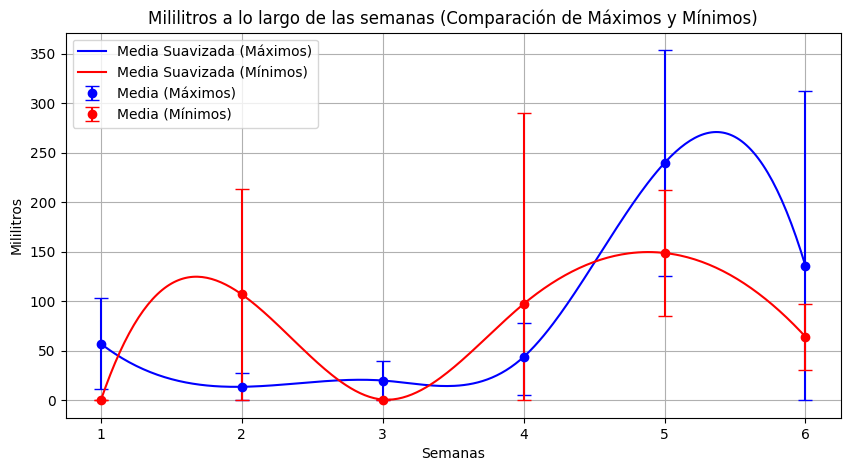

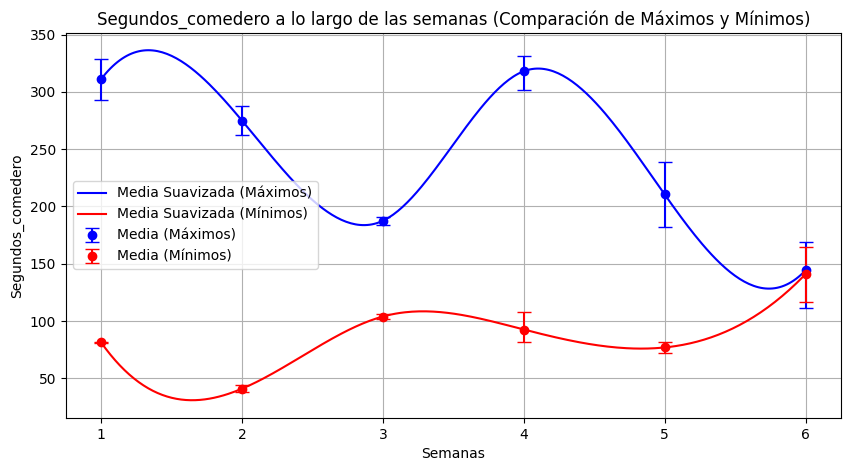

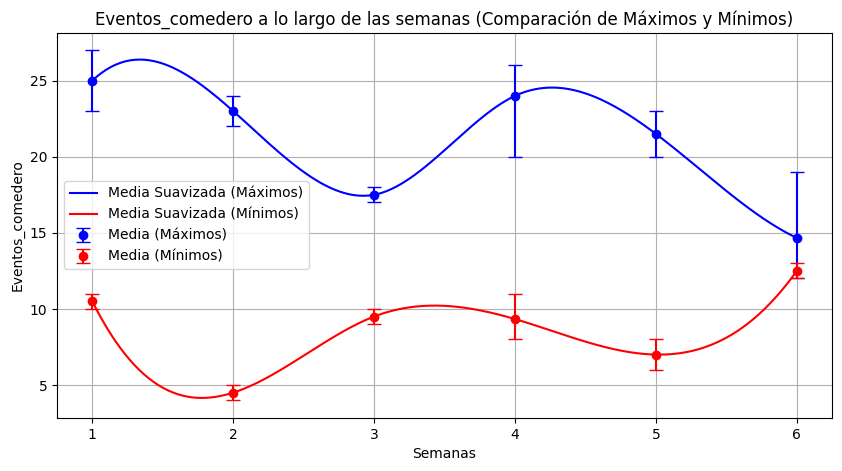

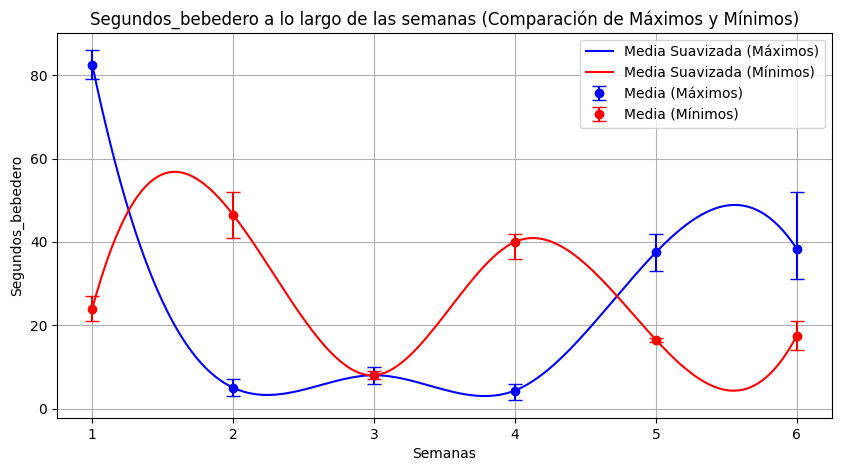

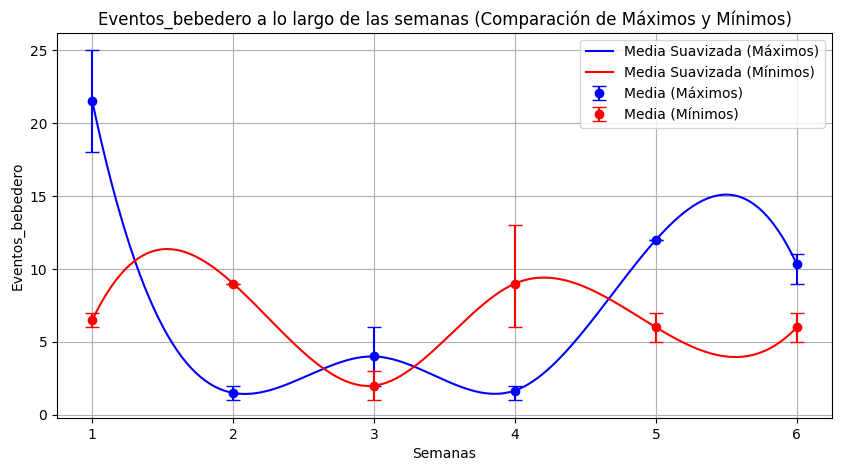

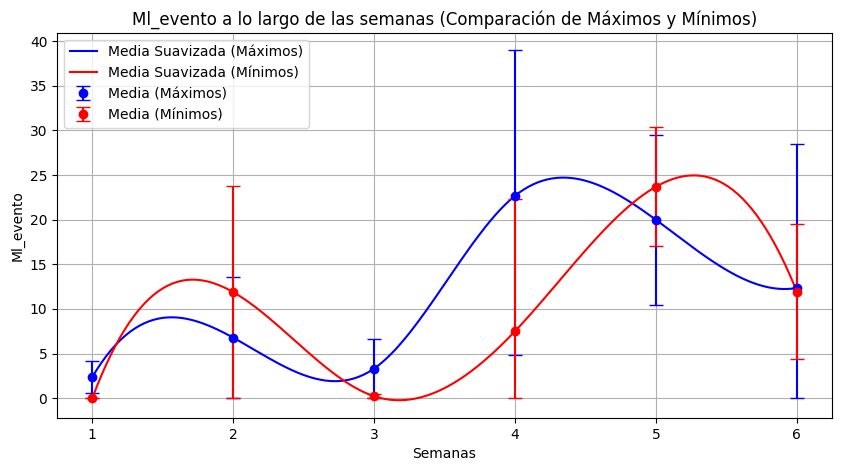

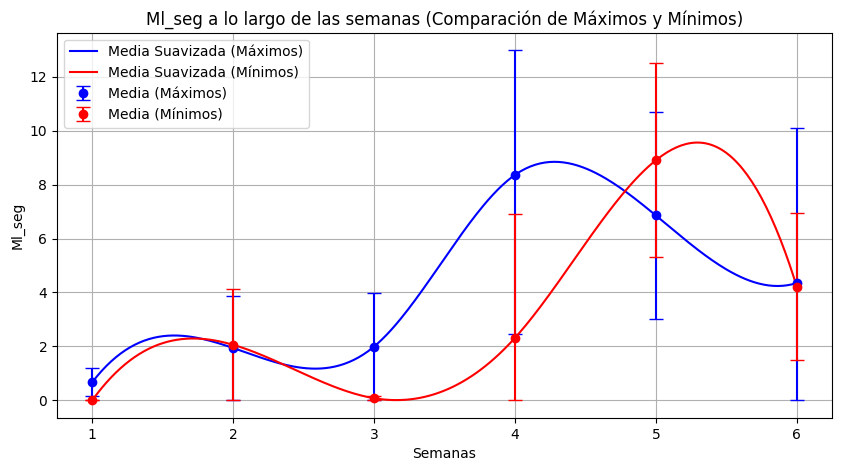

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Definir las variables que estamos analizando
variables = [
    "ganancia_peso", "mililitros", "segundos_comedero", "eventos_comedero",
    "segundos_bebedero", "eventos_bebedero", "ml_evento", "ml_seg"
]

# Definir los archivos y rutas en orden cronológico para máximos
max_files_with_dates = {
    "09-12_09-15": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_09-12_09-15.xlsx",
    "09-16_09-22": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_09-16_09-22.xlsx",
    "09-23_09-29": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_09-23_09-29.xlsx",
    "09-30_10-06": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_09-30_10-06.xlsx",
    "10-07_10-13": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_10-07_10-13.xlsx",
    "10-14_10-20": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_max_10-14_10-20.xlsx"
}

# Definir los archivos y rutas en orden cronológico para mínimos
min_files_with_dates = {
    "09-12_09-15": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_09-12_09-15.xlsx",
    "09-16_09-22": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_09-16_09-22.xlsx",
    "09-23_09-29": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_09-23_09-29.xlsx",
    "09-30_10-06": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_09-30_10-06.xlsx",
    "10-07_10-13": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_10-07_10-13.xlsx",
    "10-14_10-20": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\df_ganacia_peso_min_10-14_10-20.xlsx"
}

# Ordenar los archivos cronológicamente y cargar en un dataframe transpuesto para máximos
max_ordered_file_paths = [max_files_with_dates[date] for date in sorted(max_files_with_dates)]
max_ordered_transposed_data_frames = [pd.read_excel(file).set_index("Unnamed: 0").T for file in max_ordered_file_paths]
max_ordered_transposed_combined_df = pd.concat(max_ordered_transposed_data_frames, ignore_index=True)

# Ordenar los archivos cronológicamente y cargar en un dataframe transpuesto para mínimos
min_ordered_file_paths = [min_files_with_dates[date] for date in sorted(min_files_with_dates)]
min_ordered_transposed_data_frames = [pd.read_excel(file).set_index("Unnamed: 0").T for file in min_ordered_file_paths]
min_ordered_transposed_combined_df = pd.concat(min_ordered_transposed_data_frames, ignore_index=True)

# Número de semanas (conjuntos de datos) a analizar
weeks = len(max_ordered_transposed_combined_df) // len(variables)

# Dividir los datos en conjuntos semanales en orden cronológico para cada conjunto (máximos y mínimos)
max_ordered_weekly_data = [
    max_ordered_transposed_combined_df.iloc[i*len(variables):(i+1)*len(variables)].reset_index(drop=True) 
    for i in range(weeks)
]

min_ordered_weekly_data = [
    min_ordered_transposed_combined_df.iloc[i*len(variables):(i+1)*len(variables)].reset_index(drop=True) 
    for i in range(weeks)
]

# Crear gráficos combinados para cada variable, mostrando tanto los valores de los archivos "max" como los "min"
for i, variable in enumerate(variables):
    # Valores de los datos máximos
    max_media_values = [week.iloc[i]["Media"] for week in max_ordered_weekly_data]
    max_max_values = [week.iloc[i]["Máximo"] for week in max_ordered_weekly_data]
    max_min_values = [week.iloc[i]["Mínimo"] for week in max_ordered_weekly_data]
    max_error_upper = [max_max_values[j] - max_media_values[j] for j in range(len(max_media_values))]
    max_error_lower = [max_media_values[j] - max_min_values[j] for j in range(len(max_media_values))]
    
    # Valores de los datos mínimos
    min_media_values = [week.iloc[i]["Media"] for week in min_ordered_weekly_data]
    min_max_values = [week.iloc[i]["Máximo"] for week in min_ordered_weekly_data]
    min_min_values = [week.iloc[i]["Mínimo"] for week in min_ordered_weekly_data]
    min_error_upper = [min_max_values[j] - min_media_values[j] for j in range(len(min_media_values))]
    min_error_lower = [min_media_values[j] - min_min_values[j] for j in range(len(min_media_values))]
    
    # Crear el gráfico
    plt.figure(figsize=(10, 5))
    
    # Índice de semanas para el eje x
    semanas = np.arange(1, len(max_media_values) + 1)

    # Suavizado de la serie temporal
    semanas_suavizadas = np.linspace(semanas.min(), semanas.max(), 300)
    
    # Para datos máximos
    spline_max = make_interp_spline(semanas, max_media_values, k=3)
    max_suavizada = spline_max(semanas_suavizadas)
    plt.plot(semanas_suavizadas, max_suavizada, color='blue', label='Media Suavizada (Máximos)', linestyle='-', linewidth=1.5)
    
    # Error bars para los valores máximos
    plt.errorbar(
        semanas, max_media_values,
        yerr=[max_error_lower, max_error_upper],
        fmt='o', color='blue', label='Media (Máximos)', capsize=5
    )

    # Para datos mínimos
    spline_min = make_interp_spline(semanas, min_media_values, k=3)
    min_suavizada = spline_min(semanas_suavizadas)
    plt.plot(semanas_suavizadas, min_suavizada, color='red', label='Media Suavizada (Mínimos)', linestyle='-', linewidth=1.5)
    
    # Error bars para los valores mínimos
    plt.errorbar(
        semanas, min_media_values,
        yerr=[min_error_lower, min_error_upper],
        fmt='o', color='red', label='Media (Mínimos)', capsize=5
    )
    
    # Etiquetas y título
    plt.title(f'{variable.capitalize()} a lo largo de las semanas (Comparación de Máximos y Mínimos)')
    plt.xlabel('Semanas')
    plt.ylabel(variable.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


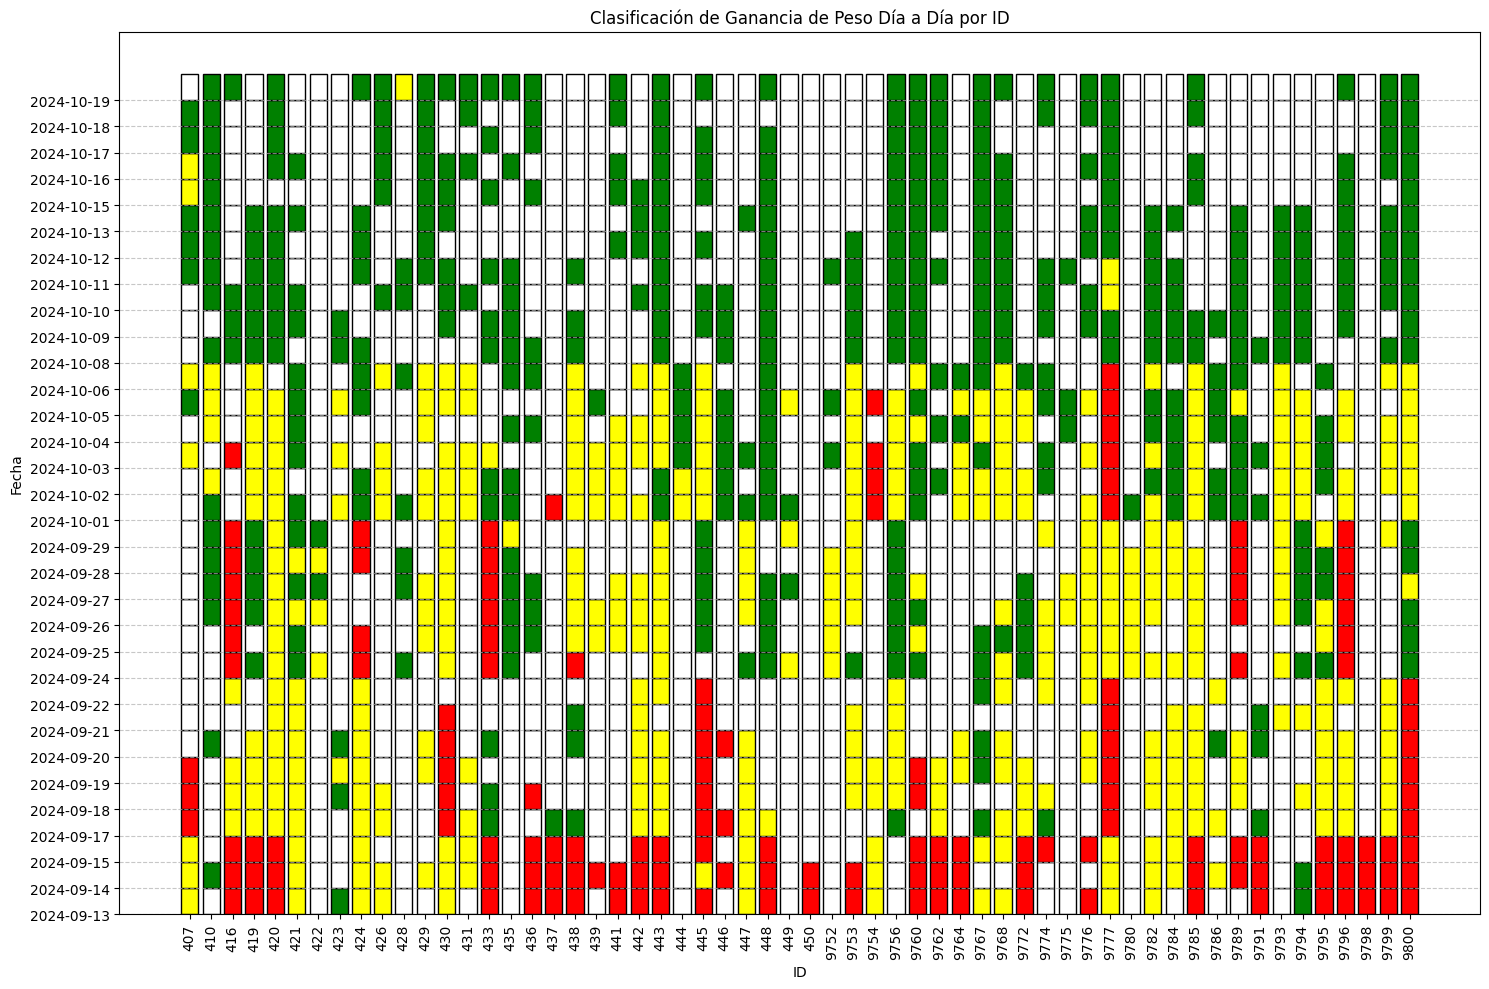

In [2]:
# Cargar el archivo CSV proporcionado para obtener las fechas y valores
csv_path = r"C:\Users\alvar\OneDrive\Projects\Hydrapig\CSV\df_tabla_final.csv"
df_combined_daily = pd.read_csv(csv_path)

# Convertir la columna de fecha ('timestamp') a formato datetime y renombrar a 'Fecha' para consistencia
df_combined_daily['Fecha'] = pd.to_datetime(df_combined_daily['timestamp'])

# Definir los umbrales para la clasificación de ganancia de peso
ganancia_max = 0.4  # Umbral de ganancia máxima
ganancia_min = 0.2  # Umbral de ganancia mínima

# Aplicar la función de clasificación a cada registro de ganancia de peso
def clasificar_ganancia(x):
    if x > ganancia_max:
        return 'Ganancia Máxima'
    elif x < ganancia_min:
        return 'Ganancia Mínima'
    else:
        return 'Media'

df_combined_daily['Clasificación Ganancia'] = df_combined_daily['ganancia_peso'].apply(clasificar_ganancia)

# Diccionario de colores para la clasificación
colors = {
    'Ganancia Máxima': 'green',   # Verde para ganancia > 0.6
    'Media': 'yellow',            # Amarillo para ganancia entre 0.3 y 0.6
    'Ganancia Mínima': 'red'      # Rojo para ganancia < 0.3
}

# Extraer IDs únicos y fechas para el gráfico
unique_ids = df_combined_daily['ID'].unique()
dates = sorted(df_combined_daily['Fecha'].unique())  # Fechas únicas y ordenadas cronológicamente

# Convertir las fechas en 'dates' a un formato que permita aplicar strftime
dates = [pd.to_datetime(date) for date in dates]

# Reintentar la generación de la gráfica con las fechas convertidas
plt.figure(figsize=(15, 10))

# Iterar sobre cada día y cada ID para representar una barra de color correspondiente
for j, date in enumerate(dates):
    df_date = df_combined_daily[df_combined_daily['Fecha'] == date]
    
    for i, id_val in enumerate(unique_ids):
        if id_val in df_date['ID'].values:
            # Obtener la clasificación de ganancia de ese día para el ID
            clasificacion = df_date[df_date['ID'] == id_val]['Clasificación Ganancia'].values[0]
            color = colors[clasificacion]
        else:
            # Si no hay datos para ese día y ID, se deja en blanco
            color = 'white'
        
        # Dibujar la barra para el ID y la fecha correspondiente
        plt.bar(i, 1, bottom=j, color=color, edgecolor='black')

# Configuración de la gráfica
plt.title('Clasificación de Ganancia de Peso Día a Día por ID')
plt.xlabel('ID')
plt.ylabel('Fecha')
plt.xticks(range(len(unique_ids)), unique_ids, rotation=90)  # Mostrar cada ID en el eje X
plt.yticks(range(len(dates)), [date.strftime('%Y-%m-%d') for date in dates])  # Mostrar las fechas en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

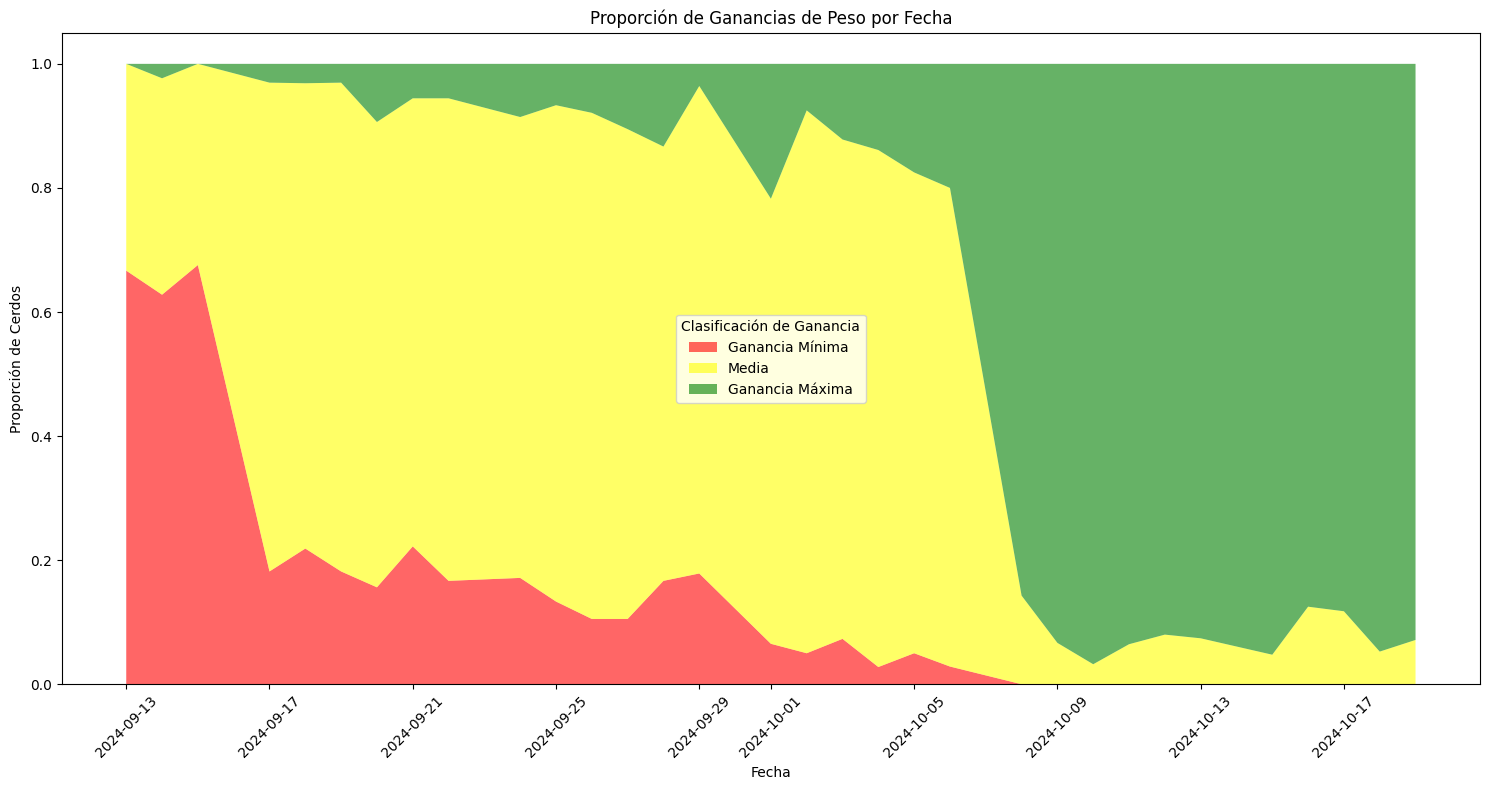

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el DataFrame `df_combined_daily` cargado y filtrado
# Convertir la columna de fecha ('timestamp') a formato datetime y renombrar a 'Fecha' para consistencia
df_combined_daily['Fecha'] = pd.to_datetime(df_combined_daily['timestamp'])

# Definir los umbrales para la clasificación de ganancia de peso
ganancia_max = 0.5  # Umbral de ganancia máxima
ganancia_min = 0.2  # Umbral de ganancia mínima

# Aplicar la función de clasificación a cada registro de ganancia de peso
def clasificar_ganancia(x):
    if x > ganancia_max:
        return 'Ganancia Máxima'
    elif x < ganancia_min:
        return 'Ganancia Mínima'
    else:
        return 'Media'

# Filtrar valores de ganancia de peso no válidos (NaN o cero)
df_filtered = df_combined_daily.dropna(subset=['ganancia_peso'])
df_filtered = df_filtered[df_filtered['ganancia_peso'] != 0]

# Clasificar las ganancias después de filtrar
df_filtered['Clasificación Ganancia'] = df_filtered['ganancia_peso'].apply(clasificar_ganancia)

# Contar cuántos cerdos caen en cada categoría de ganancia para cada fecha
df_count_per_day = df_filtered.groupby(['Fecha', 'Clasificación Ganancia']).size().unstack(fill_value=0)

# Asegurar un total constante de cerdos por fecha (normalizando las proporciones)
total_cerdos_por_dia = df_count_per_day.sum(axis=1)
df_proportion_per_day = df_count_per_day.div(total_cerdos_por_dia, axis=0)

# Configuración del gráfico de áreas apiladas
plt.figure(figsize=(15, 8))

# Crear el gráfico de áreas apiladas con proporciones
plt.stackplot(
    df_proportion_per_day.index,
    df_proportion_per_day['Ganancia Mínima'],
    df_proportion_per_day['Media'],
    df_proportion_per_day['Ganancia Máxima'],
    labels=['Ganancia Mínima', 'Media', 'Ganancia Máxima'],
    colors=['red', 'yellow', 'green'],
    alpha=0.6
)

# Configuración del gráfico
plt.title('Proporción de Ganancias de Peso por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Proporción de Cerdos')
plt.legend(title='Clasificación de Ganancia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


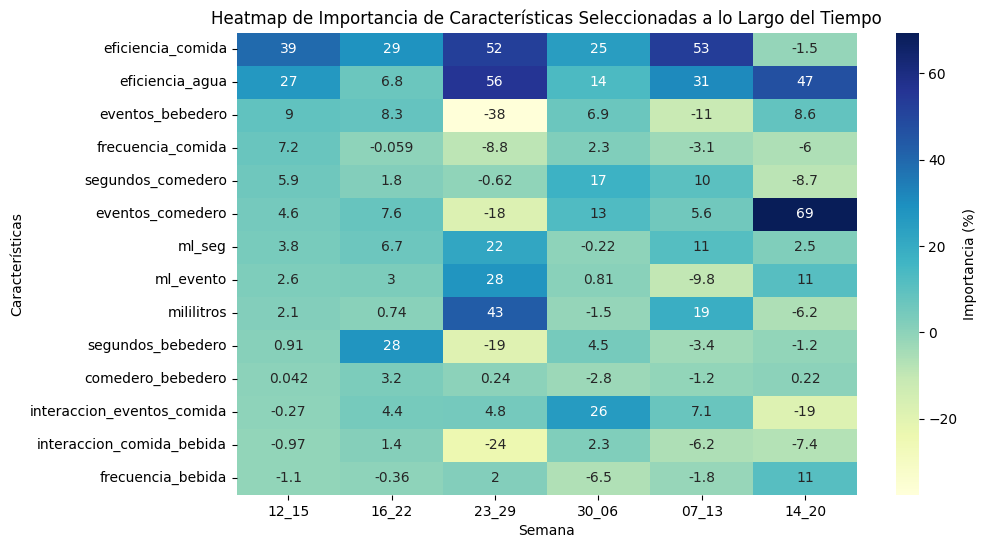

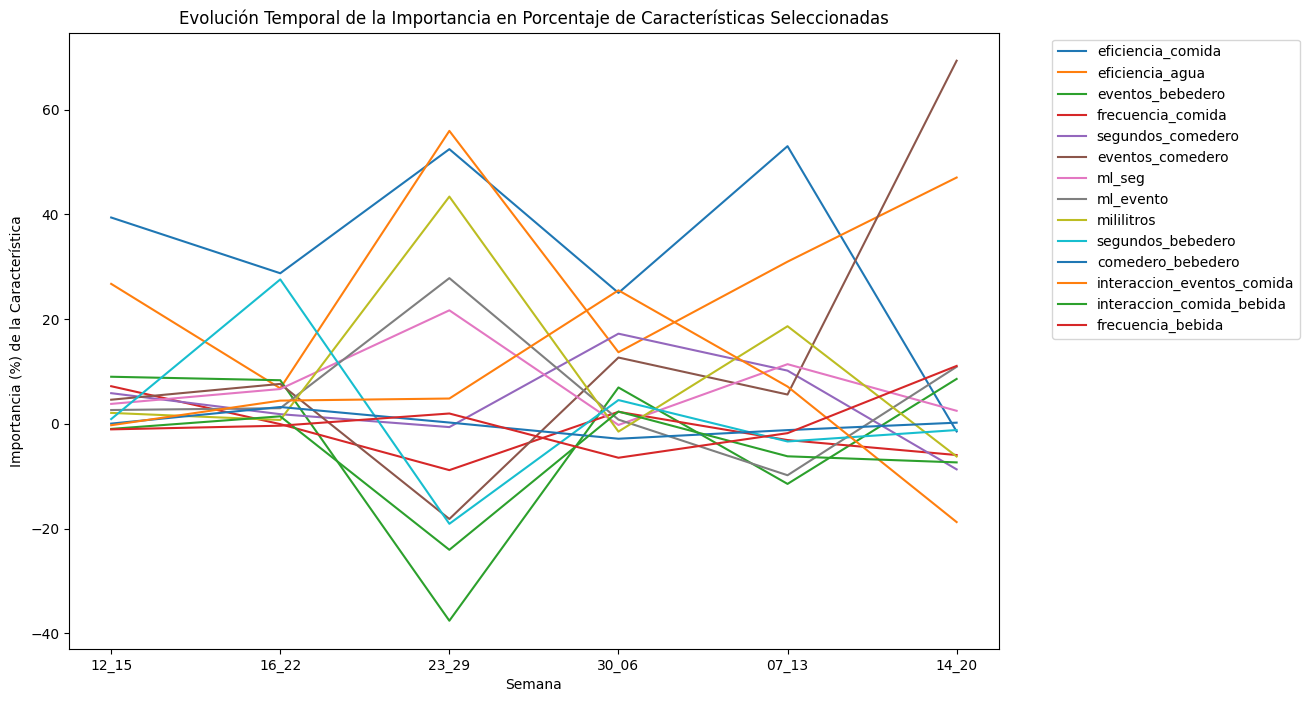

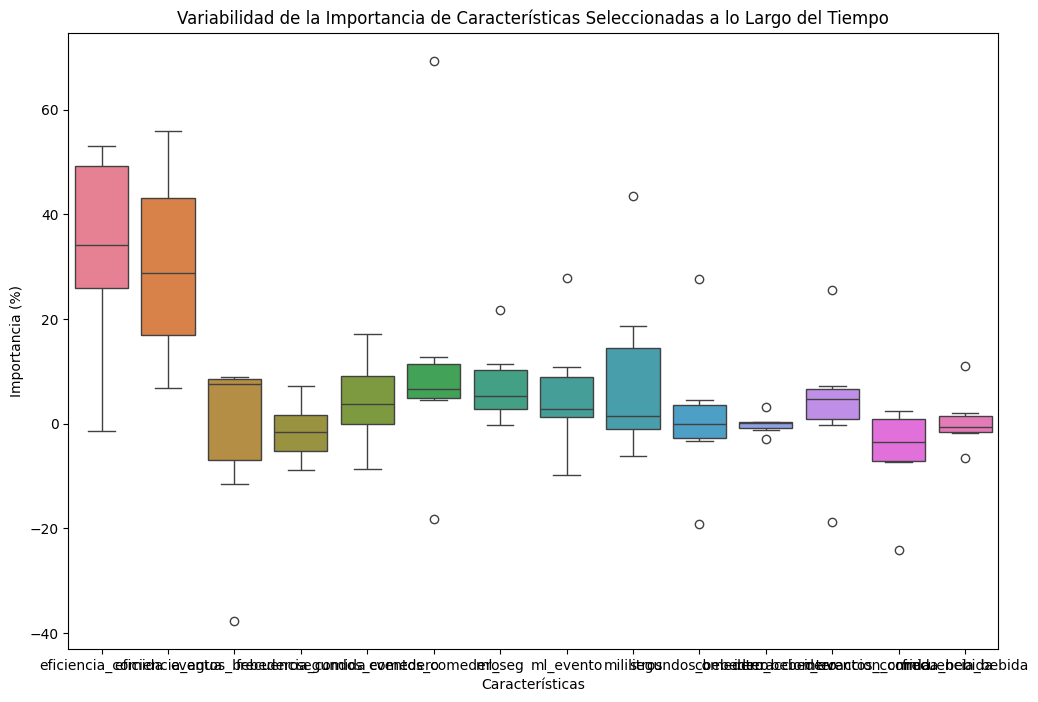

<Figure size 1200x800 with 0 Axes>

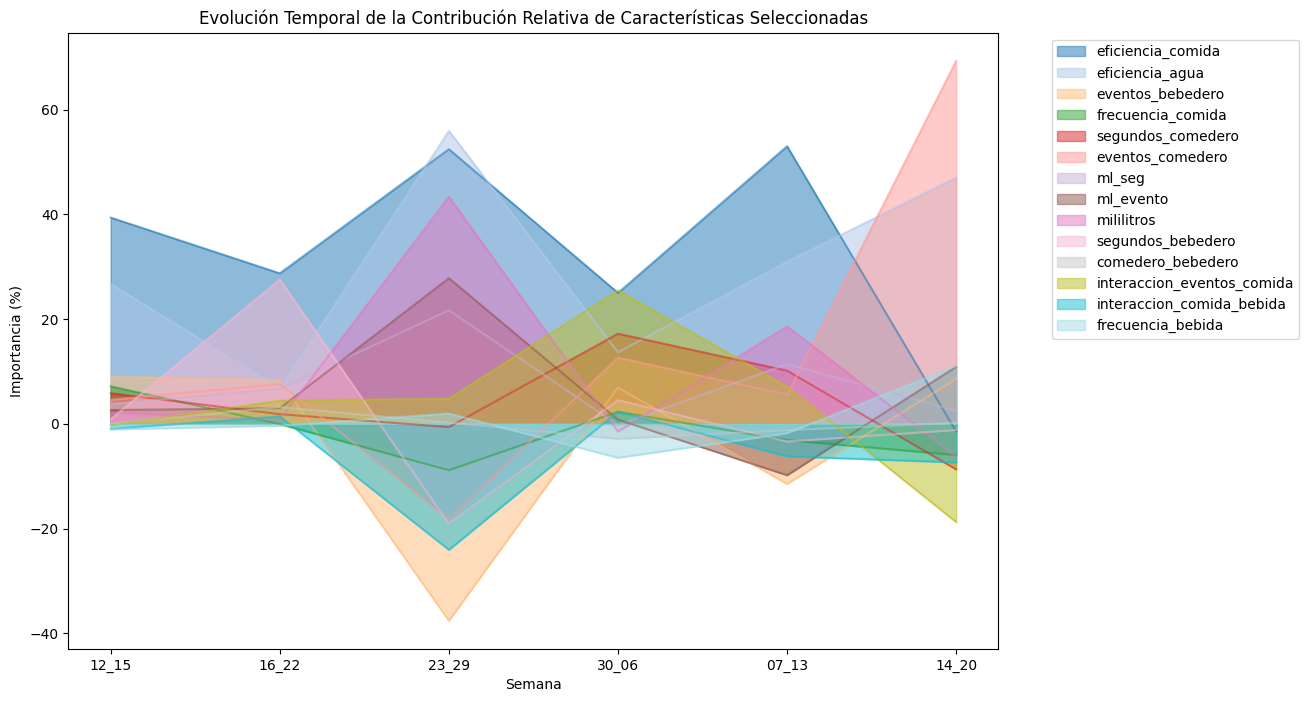

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Cargar los archivos CSV de importancia de características
file_paths = {
    "12_15": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_12_15.csv",
    "16_22": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_16_22.csv",
    "23_29": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_23_29.csv",
    "30_06": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_30_06.csv",
    "07_13": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_07_13.csv",
    "14_20": r"C:\Users\alvar\OneDrive\Projects\Hydrapig\Results\importancia_14_20.csv"
}
# Cargar y organizar los datos de importancia
importance_data = pd.DataFrame()
for week, path in file_paths.items():
    df = pd.read_csv(path)
    df = df.rename(columns={'Importancia': week})
    if importance_data.empty:
        importance_data = df.set_index('Características')
    else:
        importance_data[week] = df.set_index('Características')[week]

# Transponer para que las semanas sean el índice
importance_data = importance_data.T

# Filtrar solo las características seleccionadas


importance_selected = importance_data

# Convertir cada valor de importancia en un porcentaje de la suma total de las importancias de las variables seleccionadas para cada semana
importance_selected_percentage = importance_selected.div(importance_selected.sum(axis=1), axis=0) * 100

# 1. Heatmap de Importancia Temporal
plt.figure(figsize=(10, 6))
sns.heatmap(importance_selected_percentage.T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Importancia (%)'})
plt.xlabel("Semana")
plt.ylabel("Características")
plt.title("Heatmap de Importancia de Características Seleccionadas a lo Largo del Tiempo")
plt.show()

# 2. Análisis de Tendencias Individuales de Características Clave
plt.figure(figsize=(12, 8))
for feature in importance_selected.columns:
    plt.plot(importance_selected_percentage.index, importance_selected_percentage[feature], label=feature)
plt.xlabel("Semana")
plt.ylabel("Importancia (%) de la Característica")
plt.title("Evolución Temporal de la Importancia en Porcentaje de Características Seleccionadas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Box Plot de Importancias por Característica
plt.figure(figsize=(12, 8))
sns.boxplot(data=importance_selected_percentage)
plt.xlabel("Características")
plt.ylabel("Importancia (%)")
plt.title("Variabilidad de la Importancia de Características Seleccionadas a lo Largo del Tiempo")
plt.show()

# 4. Área Apilada para la Contribución Relativa de las Características
plt.figure(figsize=(12, 8))
importance_selected_percentage.plot(kind='area', stacked=False, figsize=(12, 8), colormap="tab20")
plt.xlabel("Semana")
plt.ylabel("Importancia (%)")
plt.title("Evolución Temporal de la Contribución Relativa de Características Seleccionadas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

